In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('GlobalFirePower.csv')

In [4]:
print(df.head())

         Country ISO3  Rank  Total Population  Manpower Available  \
0  United States  USA     1         323995528           145215000   
1         Russia  RUS     2         142355415            70000000   
2          China  CHN     3        1373541278           750000000   
3          India  IND     4        1266883598           616000000   
4         France  FRA     5          66836154            30000000   

   Fit-for-Service  Reaching Military Age  Total Military Personnel  \
0        120025000                4220000                   2363675   
1         47000000                1355000                   3371027   
2        619000000               19550000                   3712500   
3        489600000               22900000                   4207250   
4         23750000                 775000                    387635   

   Active Personnel  Reserve Personnel  ...  Railway Coverage (km)  \
0           1373650             990025  ...                 224792   
1            79852

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    133 non-null    object
 1   ISO3                       133 non-null    object
 2   Rank                       133 non-null    int64 
 3   Total Population           133 non-null    int64 
 4   Manpower Available         133 non-null    int64 
 5   Fit-for-Service            133 non-null    int64 
 6   Reaching Military Age      133 non-null    int64 
 7   Total Military Personnel   133 non-null    int64 
 8   Active Personnel           133 non-null    int64 
 9   Reserve Personnel          133 non-null    int64 
 10  Total Aircraft Strength    133 non-null    int64 
 11  Fighter Aircraft           133 non-null    int64 
 12  Attack Aircraft            133 non-null    int64 
 13  Transport Aircraft         133 non-null    int64 
 14  Trainer Ai

In [6]:
print(df.isnull().sum())

Country                      0
ISO3                         0
Rank                         0
Total Population             0
Manpower Available           0
Fit-for-Service              0
Reaching Military Age        0
Total Military Personnel     0
Active Personnel             0
Reserve Personnel            0
Total Aircraft Strength      0
Fighter Aircraft             0
Attack Aircraft              0
Transport Aircraft           0
Trainer Aircraft             0
Total Helicopter Strength    0
Attack Helicopters           0
Combat Tanks                 0
Armored Fighting Vehicles    0
Self-Propelled Artillery     0
Towed Artillery              0
Rocket Projectors            0
Total Naval Assets           0
Aircraft Carriers            0
Frigates                     0
Destroyers                   0
Corvettes                    0
Submarines                   0
Patrol Craft                 0
Mine Warfare Vessels         0
Production (bbl/dy)          0
Consumption (bbl/dy)         0
Proven R

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
# Перетворюємо категоріальні змінні у числові коди
df['Country_code'] = df['Country'].astype('category').cat.codes
df['ISO3_code'] = df['ISO3'].astype('category').cat.codes

# Перевіримо результат
df[['Country', 'Country_code', 'ISO3', 'ISO3_code']].head()


,Country,Country_code,ISO3,ISO3_code
0,United States,125,USA,126
1,Russia,96,RUS,96
2,China,25,CHN,24
3,India,48,IND,48
4,France,39,FRA,39


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
for col in ["Coastline (km)", "Waterways (km)"]:
    df[col] = df[col].astype(str).str.replace(",", "").str.extract(r'(\d+)').astype(float)

In [16]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [17]:
print("🔹 Числові колонки для масштабування:")
print(numeric_cols.tolist())

🔹 Числові колонки для масштабування:
['Rank', 'Total Population', 'Manpower Available', 'Fit-for-Service', 'Reaching Military Age', 'Total Military Personnel', 'Active Personnel', 'Reserve Personnel', 'Total Aircraft Strength', 'Fighter Aircraft', 'Attack Aircraft', 'Transport Aircraft', 'Trainer Aircraft', 'Total Helicopter Strength', 'Attack Helicopters', 'Combat Tanks', 'Armored Fighting Vehicles', 'Self-Propelled Artillery', 'Towed Artillery', 'Rocket Projectors', 'Total Naval Assets', 'Aircraft Carriers', 'Frigates', 'Destroyers', 'Corvettes', 'Submarines', 'Patrol Craft', 'Mine Warfare Vessels', 'Production (bbl/dy)', 'Consumption (bbl/dy)', 'Proven Reserves (bbl)', 'Labor Force', 'Merchant Marine Strength', 'Major Ports / Terminals', 'Roadway Coverage (km)', 'Railway Coverage (km)', 'Serivecable Airports', 'Defense Budget', 'External Debt', 'Foreign Exchange / Gold', 'Purchasing Power Parity', 'Square Land Area (km)', 'Coastline (km)', 'Shared Borders (km)', 'Waterways (km)']


In [19]:
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [20]:
df['Defense Budget_scaled'] = scaler.fit_transform(df[['Defense Budget']])

In [23]:
df_scaled.head()

,Country,ISO3,Rank,Total Population,Manpower Available,Fit-for-Service,Reaching Military Age,Total Military Personnel,Active Personnel,Reserve Personnel,...,Defense Budget,External Debt,Foreign Exchange / Gold,Purchasing Power Parity,Square Land Area (km),Coastline (km),Shared Borders (km),Waterways (km),Country_code,ISO3_code
0,United States,USA,0.000000,0.235557,0.193478,0.193801,0.184172,0.366522,0.607433,0.180005,...,1.000000,1.000000,0.038029,0.872571,0.574701,0.098505,0.536492,0.372809,125,126
1,Russia,RUS,0.007576,0.103259,0.093174,0.075814,0.059046,0.522877,0.352709,0.467727,...,0.075860,0.028716,0.118204,0.175945,1.000000,0.186247,0.997818,0.927273,96,96
2,China,CHN,0.015152,1.000000,1.000000,1.000000,0.853692,0.575879,1.000000,0.264091,...,0.275081,0.054887,1.000000,1.000000,0.561266,0.071662,1.000000,1.000000,25,24
3,India,IND,0.022727,0.922315,0.821302,0.790927,1.000000,0.652671,0.602494,0.517227,...,0.086749,0.028281,0.116134,0.409925,0.192224,0.034544,0.618426,0.131818,48,48
4,France,FRA,0.030303,0.048254,0.039831,0.038249,0.033715,0.059814,0.089391,0.033388,...,0.059528,0.299255,0.044691,0.128548,0.037614,0.023919,0.181324,0.077282,39,39


In [24]:
from sklearn.model_selection import train_test_split

In [27]:
df_transformed = df_scaled.copy()

In [28]:
train_set, test_set = train_test_split(df_transformed, test_size=0.2, random_state=42)

In [31]:
print("🔹 Розмір train_set:", train_set.shape)
print("🔹 Розмір test_set:", test_set.shape)

🔹 Розмір train_set: (106, 49)
🔹 Розмір test_set: (27, 49)


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
print(df.describe())

            Rank  Total Population  Manpower Available  Fit-for-Service  \
count  133.00000      1.330000e+02        1.330000e+02     1.330000e+02   
mean    67.00000      5.360087e+07        2.552079e+07     2.054002e+07   
std     38.53786      1.653513e+08        8.531597e+07     6.943252e+07   
min      1.00000      5.858240e+05        1.317000e+05     7.710000e+04   
25%     34.00000      5.927482e+06        2.770000e+06     2.255000e+06   
50%     67.00000      1.551071e+07        6.000000e+06     4.415000e+06   
75%    100.00000      3.852326e+07        1.700000e+07     1.400000e+07   
max    133.00000      1.373541e+09        7.500000e+08     6.190000e+08   

       Reaching Military Age  Total Military Personnel  Active Personnel  \
count           1.330000e+02              1.330000e+02      1.330000e+02   
mean            8.749346e+05              4.492374e+05      1.508728e+05   
std             2.673808e+06              1.060239e+06      2.895450e+05   
min             3.03

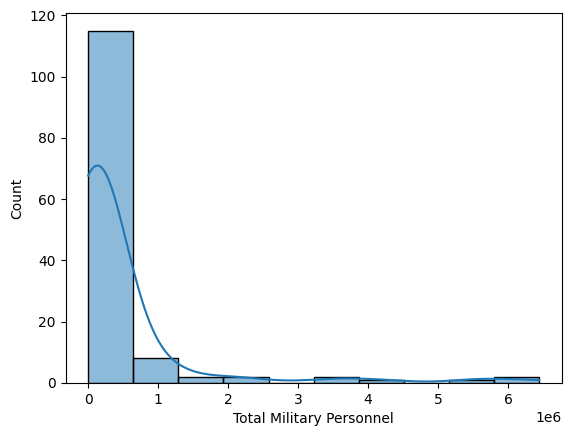

In [44]:
sns.histplot(df['Total Military Personnel'], bins=10, kde=True)
plt.show()

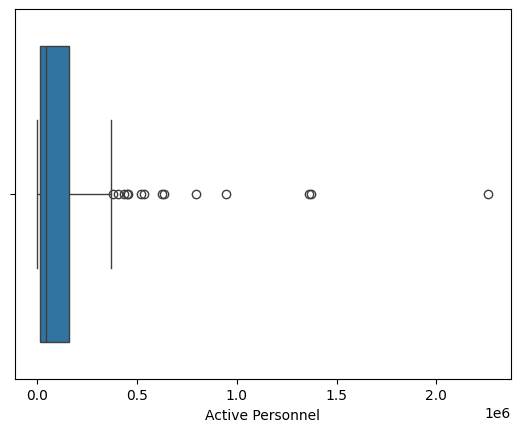

In [46]:
sns.boxplot(x=df['Active Personnel'])
plt.show()

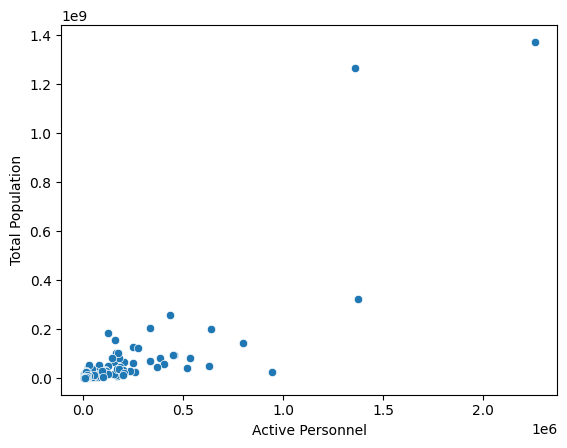

In [47]:
sns.scatterplot(x=df['Active Personnel'], y=df['Total Population'])
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()
model.fit(train_set[['Combat Tanks', 'Total Naval Assets']], train_set['Defense Budget'])

LinearRegression()

In [50]:
predictions = model.predict(test_set[['Combat Tanks', 'Total Naval Assets']])
print(predictions)

[0.01918686 0.00527986 0.00030497 0.0166833  0.00099595 0.01170105
 0.00108879 0.02280753 0.00574987 0.06532482 0.00302638 0.01186773
 0.00181339 0.00362965 0.0098416  0.00876394 0.02803327 0.03493827
 0.02271462 0.00752315 0.00039344 0.02681439 0.02578402 0.0317689
 0.00298256 0.01569827 0.0564667 ]
